In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

print('Setup complete')

Setup complete


In [528]:
df = pd.read_csv('1.04. Real-life example.csv')
df.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [529]:
### Null valuse checking...
df.rename(columns={'Engine Type':'Engine_Type'},inplace=True)
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine_Type       0
Registration      0
Year              0
Model             0
dtype: int64

We have Null values in Price and Engine Velocity..

#### Analysing the Brand vs Price

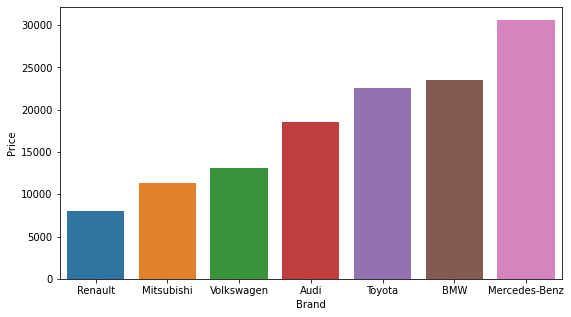

In [153]:
tmp = df.groupby('Brand').Price.mean().sort_values().reset_index()
plt.figure(figsize = (9,5))
sns.barplot(x= tmp.Brand,y = tmp.Price)
plt.show()

<li> M - Benz have highest prices...
    
<li> Toyota and BMW is the same prices..

### Body and Price..

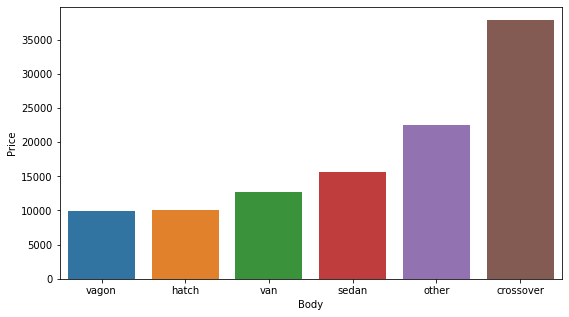

In [154]:
tmp = df.groupby('Body').Price.mean().sort_values().reset_index()
plt.figure(figsize = (9,5))
sns.barplot(x= tmp.Body,y = tmp.Price)
plt.show()

<li> vegon and hath models boday have similar range prices..

### Mileage and Price..

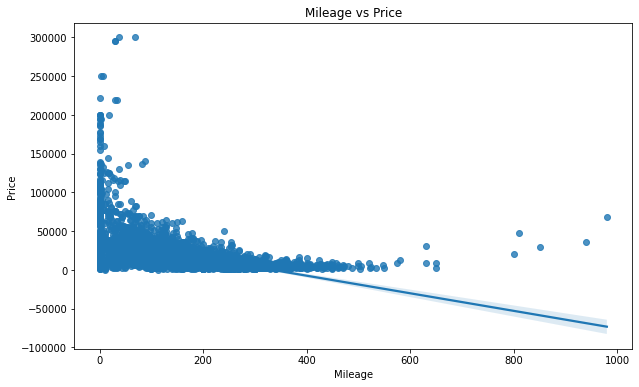

In [155]:
plt.figure(figsize=(10,6))
sns.regplot(x='Mileage',y='Price',data=df).set(xlabel='Mileage',ylabel='Price',title='Mileage vs Price')
plt.show()

Seems we have a zero mileage data lets exclude the zero valued data

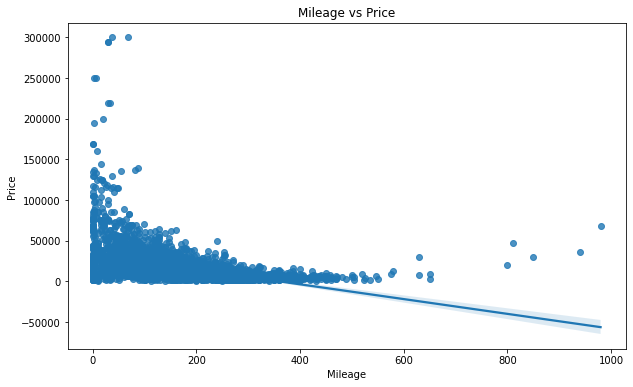

In [156]:
plt.figure(figsize=(10,6))
temp = df[df.Mileage!=0]
sns.regplot(x='Mileage',y='Price',data=temp).set(xlabel='Mileage',ylabel='Price',title='Mileage vs Price')
plt.show()

[Text(0.5, 1.0, 'Co-relation between Mileage and Price')]

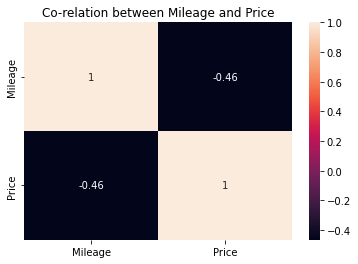

In [157]:
sns.heatmap(df[['Mileage','Price']].corr(),annot=True).set(title='Co-relation between Mileage and Price')

* with out zero Mileage.

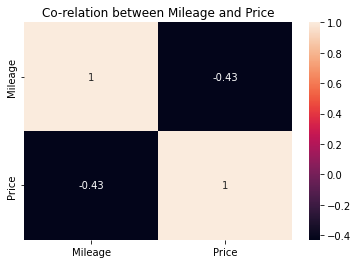

In [158]:
sns.heatmap(temp[['Mileage','Price']].corr(),annot=True).set(title='Co-relation between Mileage and Price')
plt.show()

* Price vs Mileage have a Moderate linear relation.
* We have to find out why we have zero mileage..
* we have high price when Mileage is low.

### EngineV vs Price

<AxesSubplot:xlabel='EngineV', ylabel='Price'>

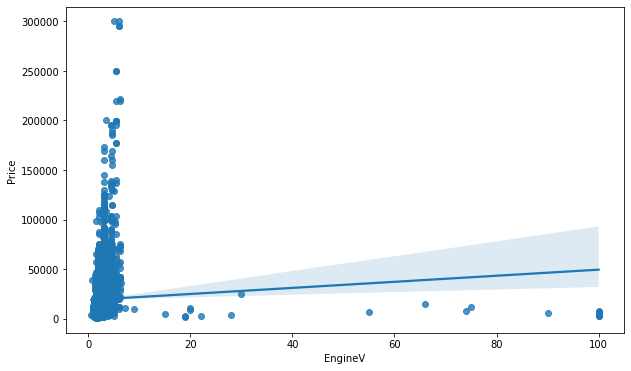

In [159]:
plt.figure(figsize=(10,6))
sns.regplot(x='EngineV',y='Price',data=df)

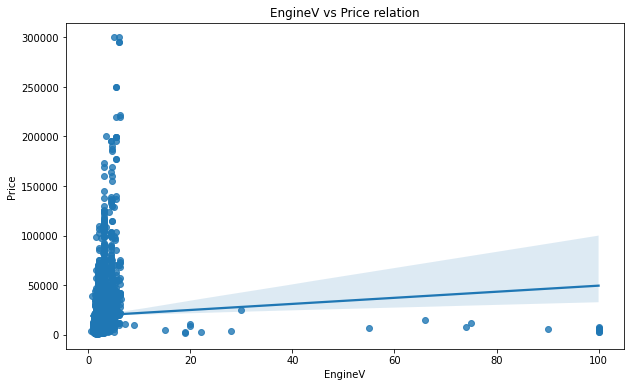

In [160]:
temp = df[df.EngineV!=np.nan]
plt.figure(figsize=(10,6))
sns.regplot(x='EngineV',y='Price',data=temp).set(title='EngineV vs Price relation')
plt.show()

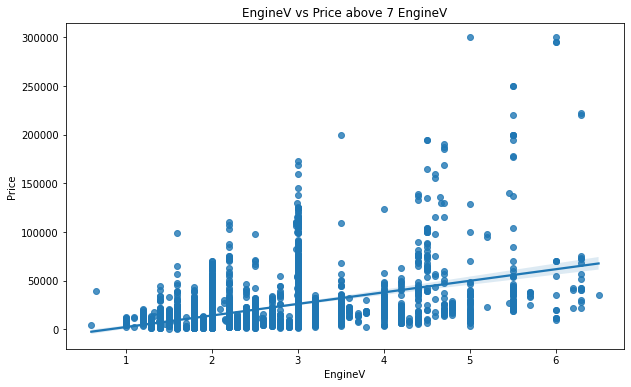

In [161]:
temp = df[df.EngineV<7]
plt.figure(figsize=(10,6))
sns.regplot(x='EngineV',y='Price',data=temp).set(title='EngineV vs Price above 7 EngineV')
plt.show()

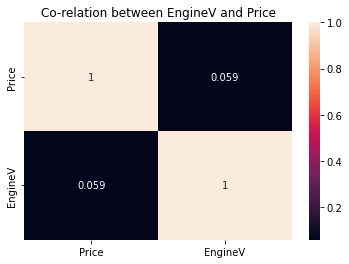

In [162]:
sns.heatmap(df[['Price','EngineV']].corr(),annot=True).set(title='Co-relation between EngineV and Price')
plt.show()

In [163]:
df.EngineV.value_counts()

2.00     709
3.00     549
2.50     350
1.60     318
2.20     294
        ... 
1.59       1
1.79       1
0.65       1
30.00      1
66.00      1
Name: EngineV, Length: 73, dtype: int64

In [164]:
df.EngineV.describe()

count    4195.000000
mean        2.790734
std         5.066437
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

* 73 Unique Values 

In [165]:
p = df.EngineV.isna()
temp = df.loc[p]
temp.head(2)

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
39,Audi,2500.0,sedan,180,NaN,Petrol,no,2000,A4
56,Toyota,10900.0,sedan,156,NaN,Gas,yes,2005,Camry


array([4174,    5,    3,    0,    0,    1,    1,    2,    1,    8],
      dtype=int64)

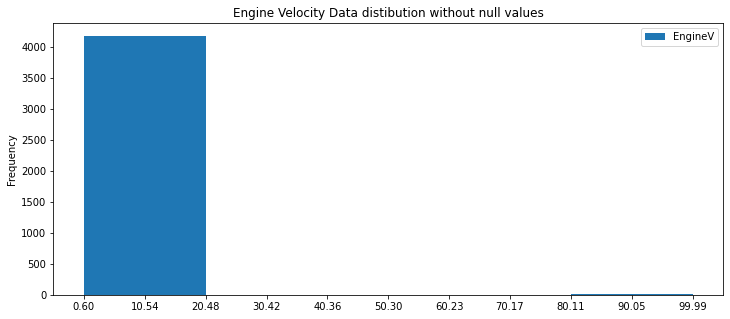

In [166]:
temp = df.loc[df.EngineV.notna()]
count,bins  = np.histogram(temp.EngineV)
temp[['EngineV']].plot(kind='hist',xticks=bins,figsize=(12,5),bins=5)
plt.title('Engine Velocity Data distibution without null values')
count

* 75% of values are between 0 and 3
* max is 99
* 150 null values are found.
* There no relation according to co-relation..
* We have Outlier where mileage is grater than 20.48

### Engine Type vs Price

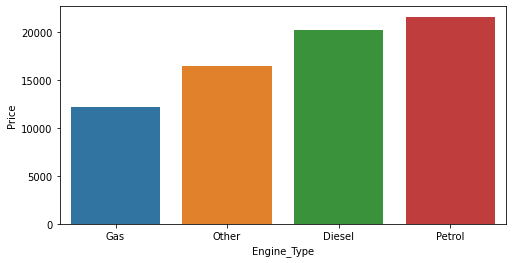

In [167]:
temp = df.groupby('Engine_Type').Price.mean().sort_values().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x=temp.Engine_Type,y=temp.Price)
plt.show()

* Engine Type can be a good predictor..

### Registration vs Price

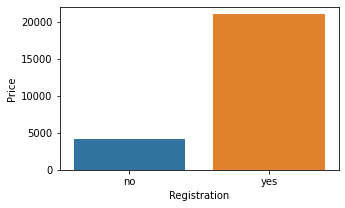

In [168]:
temp = df.groupby('Registration').Price.mean().sort_values().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x=temp.Registration,y=temp.Price)
plt.show()

* Registration can be a good predictor
* Need to understand why registration is zero

### Year and Price

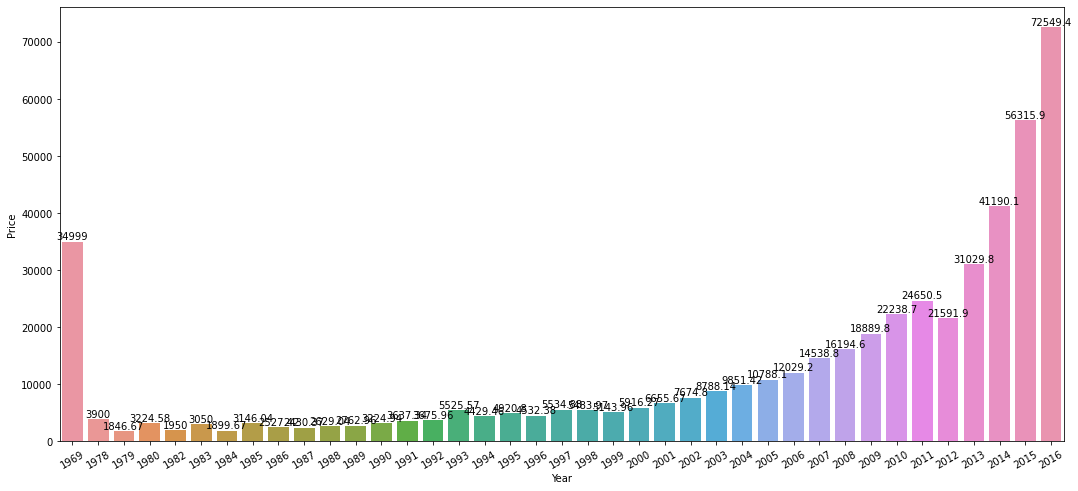

In [169]:
temp = df.groupby('Year').Price.mean().sort_values().reset_index()
plt.figure(figsize=(18,8))
ax = sns.barplot(x=temp.Year,y=temp.Price)
plt.xticks(rotation=30)
ax.bar_label(ax.containers[0])
plt.show()

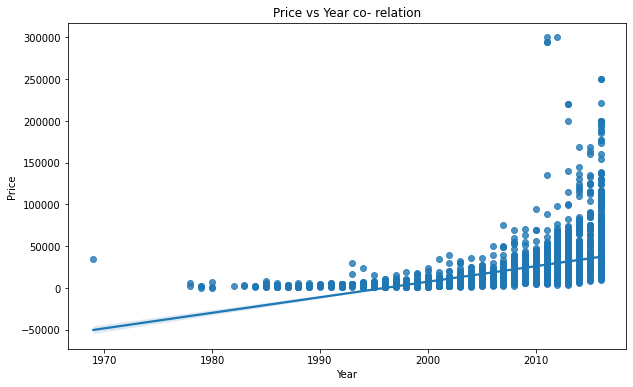

In [170]:
plt.figure(figsize=(10,6))
sns.regplot(x=df.Year,y= df.Price).set(title='Price vs Year co- relation')
plt.show()

<AxesSubplot:xlabel='Year_binned', ylabel='Price'>

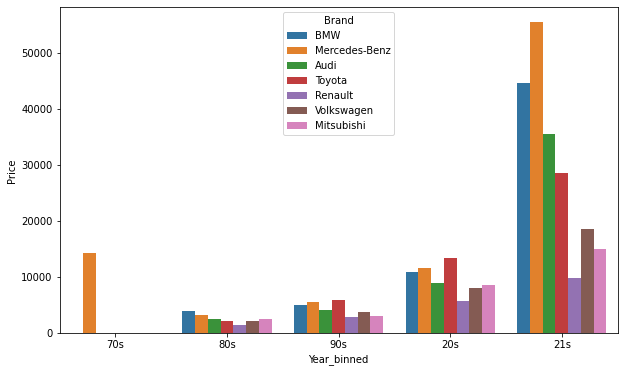

In [530]:
bins = np.linspace(min(df.Year),max(df.Year),6).round()
names = ['70s','80s','90s','20s','21s']

df['Year_binned'] = pd.cut(df['Year'], bins, labels=names, include_lowest=True )
plt.figure(figsize=(10,6))
sns.barplot(x='Year_binned',y='Price',hue='Brand',data=df,estimator=np.mean,ci=0)

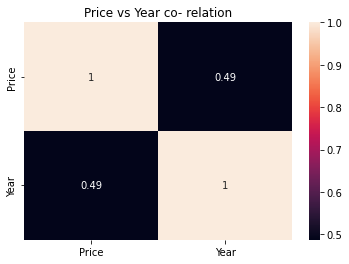

In [172]:
sns.heatmap(df[['Price','Year']].corr(),annot=True).set(title='Price vs Year co- relation')
plt.show()

* Price and year have positive corelation.
* Every year Price is increased in the data
* we have outlier at 1969
* Price drop in 2012 

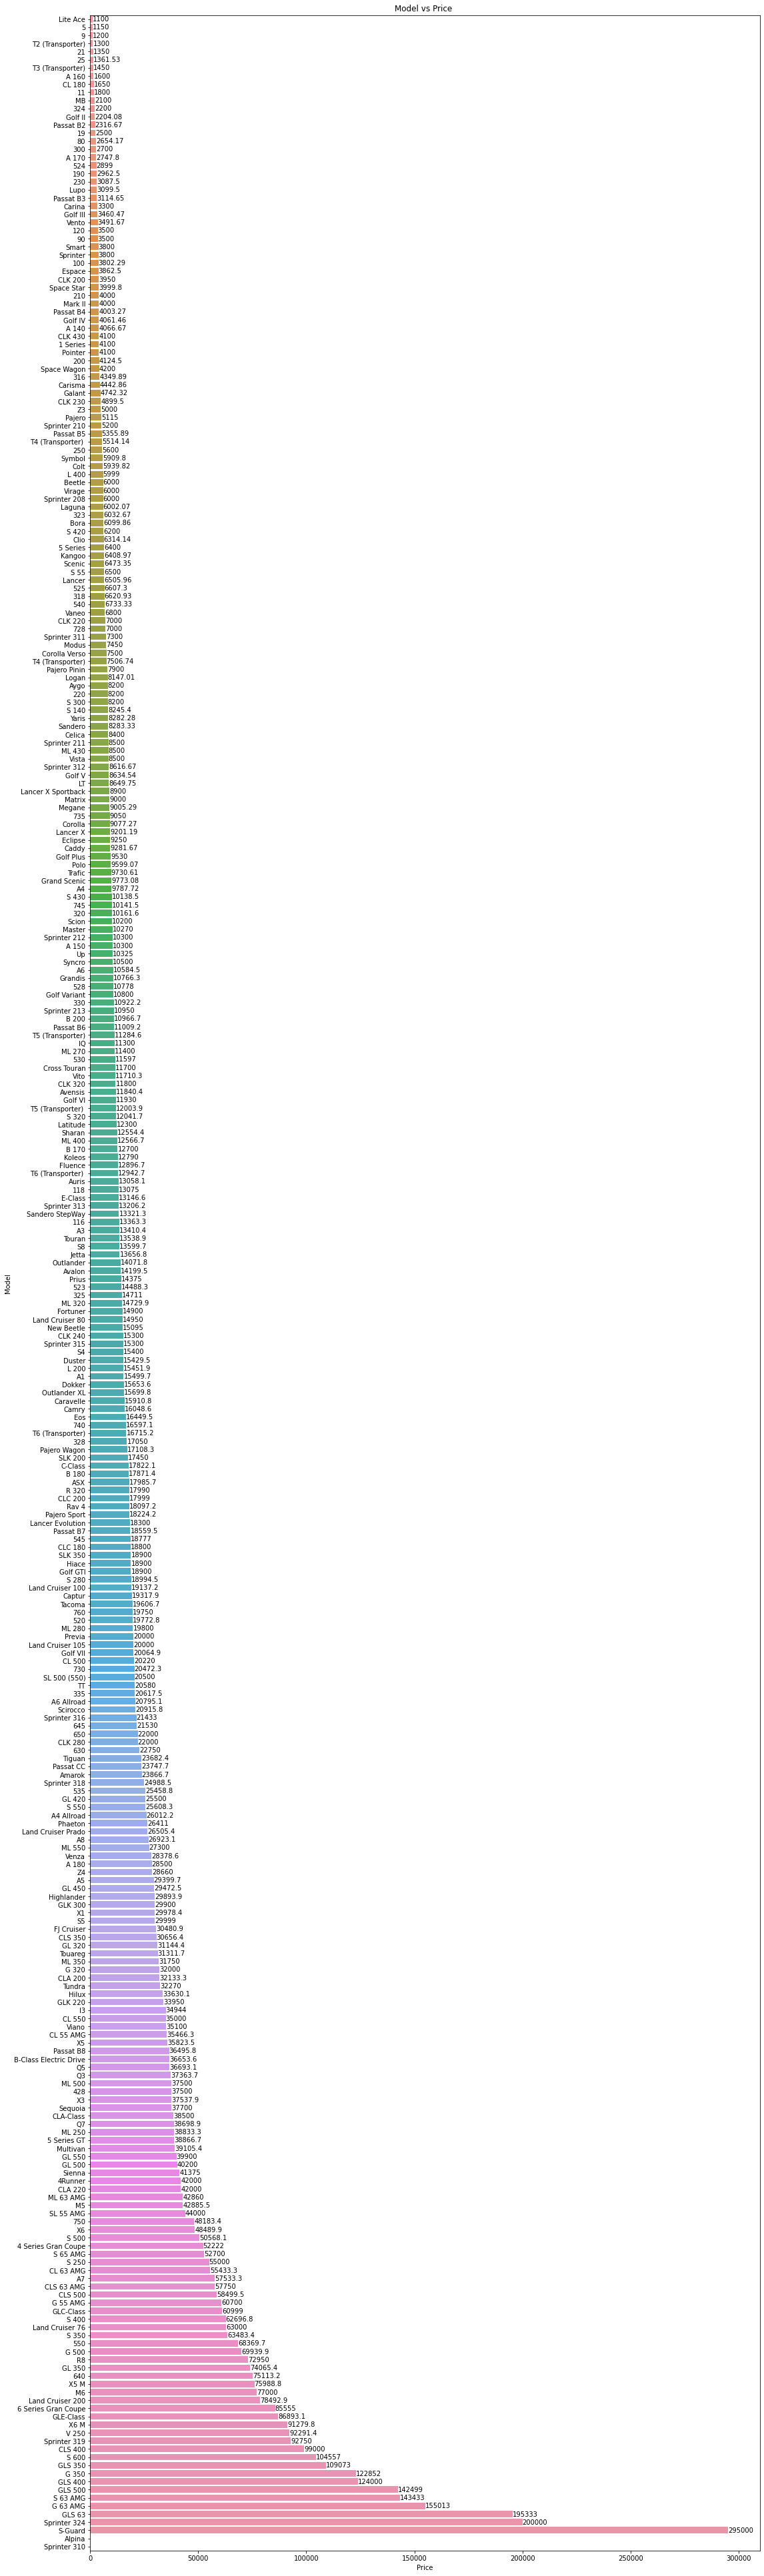

In [24]:
temp = df.groupby('Model').Price.mean().sort_values().reset_index()
plt.figure(figsize=(18,70))
ax = sns.barplot(y=temp.Model,x=temp.Price)
plt.title('Model vs Price ')
ax.bar_label(ax.containers[0])
plt.show()

<AxesSubplot:>

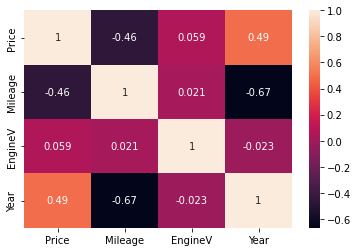

In [25]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [522]:
def model_predict(data,model):
    X = data.copy()
    y = X.pop('Price')
    
    #cross validation..
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    model.fit(x_train,y_train)
    scores = {}
    scores['MAE_train'] = mean_absolute_error(model.predict(x_train),y_train).round()
    scores['MAE_test'] = mean_absolute_error(model.predict(x_test),y_test).round()
    scores['RMSE_train'] = mean_squared_error(model.predict(x_train),y_train,squared=False).round()
    scores['RMSE_test'] = mean_squared_error(model.predict(x_test),y_test,squared=False).round()
    scores['r2_train'] = r2_score(model.predict(x_train),y_train)
    scores['r2_test'] = r2_score(model.predict(x_test),y_test)
    
    '''print('Training Data Score :\n      MAE                        MSE                 r2 score')
    print(mean_absolute_error(model.predict(x_train),y_train),'   ',\
          mean_squared_error(model.predict(x_train),y_train,squared=False),'    ',r2_score(model.predict(x_train),y_train))
    
    print('\nTesting Data Score :\n      MAE                        MSE                 r2 score')
    print(mean_absolute_error(model.predict(x_test),y_test),'   ',\
          mean_squared_error(model.predict(x_test),y_test,squared=False),'    ',r2_score(model.predict(x_test),y_test))
    print('************'*5,'\n')'''
    return scores
def scores(data):
    fig , axes= plt.subplots(3,2,figsize=(18,16))
    m = [LinearRegression(),Ridge(alpha=0.01),DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0)
         ,XGBRegressor(random_state=0),KNeighborsRegressor()]
    names = ['LinearRegression','Ridge','DecisionTreeRegressor','RandomForestRegressor'
             ,'XGBRegressor','KNeighborsRegressor']
    for i,name,ax in zip(m,names,axes.ravel()):
        scores = model_predict(data,i)
        sns.barplot(x=list(scores.keys()),y=list(scores.values()),ax=ax).set(title=name)
        ax.bar_label(ax.containers[0])
    plt.show()

## Model - Excluding EngineV

In [531]:
df = df.dropna(subset=['Price'],axis=0)
df = df.drop(['Year_binned'],axis=1)
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
data = df.drop(columns='EngineV',axis=1)
data = pd.get_dummies(data,columns=features)

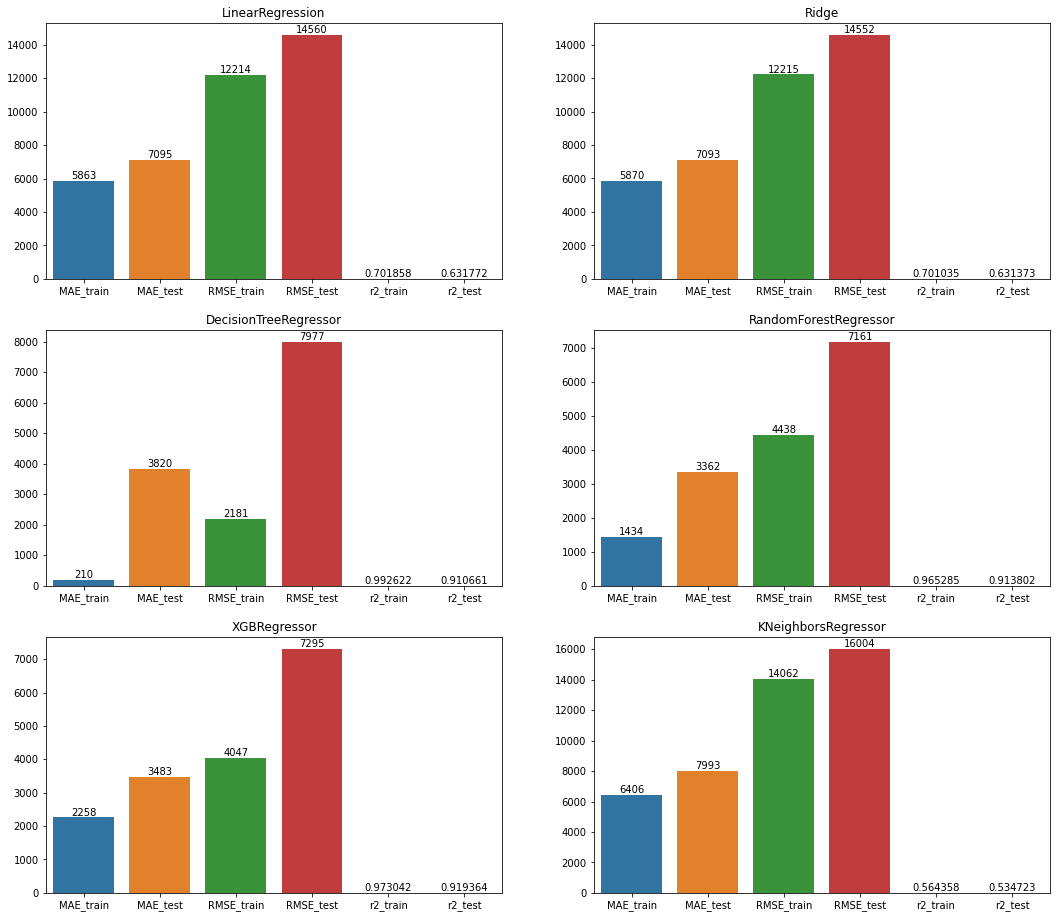

In [532]:
scores(data)

XGRegressor and Random Forest is performing well on both training and testing Data. Letsz do some cross validation on XGregressor to find the best score.

### Cross Validation

XGRegressor

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   19.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   12.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   18.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   24.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   30.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   36.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   

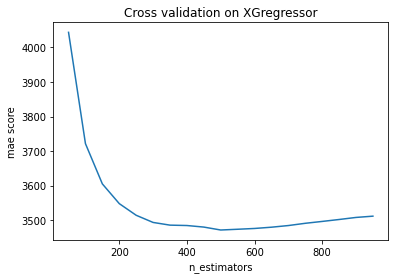

In [535]:
X = data.copy()
y = X.pop('Price')
def score(n):
    model = XGBRegressor(n_estimators=n,random_state=0)
    score = -1*cross_val_score(model,X,y,verbose=2,n_jobs=4,cv=5,scoring='neg_mean_absolute_error')
    return score.mean()
scores = {n*50:score(n*50) for n in range(1,20)}
plt.plot(list(scores.keys()),list(scores.values()))
plt.title('Cross validation on XGregressor')
plt.xlabel('n_estimators')
plt.ylabel('mae score')
plt.show()

Random Forest

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

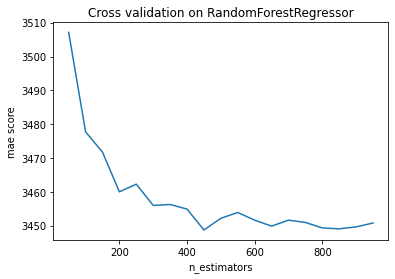

In [561]:
X = data.copy()
y = X.pop('Price')
def score(n):
    model = RandomForestRegressor(n_estimators=n,random_state=0)
    score = -1*cross_val_score(model,X,y,verbose=2,n_jobs=-1,cv=5,scoring='neg_mean_absolute_error')
    return score.mean()
scores = {n*50:score(n*50) for n in range(1,20)}
plt.plot(list(scores.keys()),list(scores.values()))
plt.title('Cross validation on RandomForestRegressor')
plt.xlabel('n_estimators')
plt.ylabel('mae score')
plt.show()

Decission Tree

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

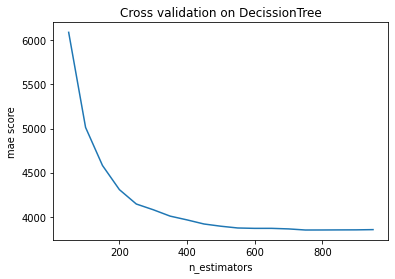

In [563]:
X = data.copy()
y = X.pop('Price')
def score(n):
    model = DecisionTreeRegressor(max_leaf_nodes=n,random_state=0)
    score = -1*cross_val_score(model,X,y,verbose=2,n_jobs=-1,cv=5,scoring='neg_mean_absolute_error')
    return score.mean()
scores = {n*50:score(n*50) for n in range(1,20)}
plt.plot(list(scores.keys()),list(scores.values()))
plt.title('Cross validation on DecissionTree')
plt.xlabel('n_estimators')
plt.ylabel('mae score')
plt.show()

Random Forest is performing well with 450 n estimators

In [570]:
model = DecisionTreeRegressor(max_leaf_nodes=750,random_state=0)
print('Decission Tree')
print(model_predict(data,model))
#Random forest
model = RandomForestRegressor(n_estimators=450,random_state=0)
print('Random Forest')
print(model_predict(data,model))
#XGRegressor
model = XGBRegressor(n_estimators=500,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

Decission Tree
{'MAE_train': 1057.0, 'MAE_test': 3827.0, 'RMSE_train': 2487.0, 'RMSE_test': 8218.0, 'r2_train': 0.9903861292433886, 'r2_test': 0.9034845734265082}
Random Forest
{'MAE_train': 1392.0, 'MAE_test': 3327.0, 'RMSE_train': 4313.0, 'RMSE_test': 7110.0, 'r2_train': 0.9672177454145351, 'r2_test': 0.9139687823166439}
XGRegressor
{'MAE_train': 1057.0, 'MAE_test': 3220.0, 'RMSE_train': 2535.0, 'RMSE_test': 6891.0, 'r2_train': 0.9899191176293803, 'r2_test': 0.9303060869126688}


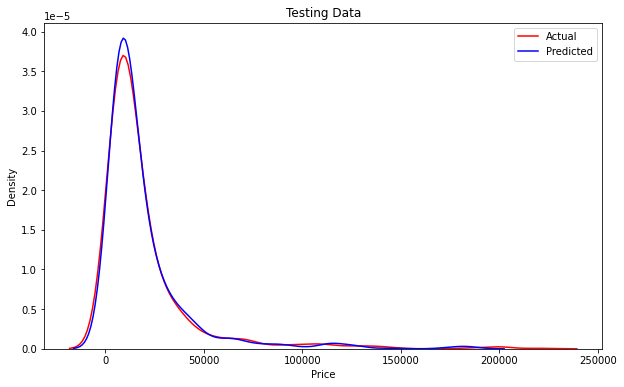

Random Forest
{'MAE_train': 1392.0, 'MAE_test': 3327.0, 'RMSE_train': 4313.0, 'RMSE_test': 7110.0, 'r2_train': 0.9672177454145351, 'r2_test': 0.9139687823166439}
XGRegressor
{'MAE_train': 1057.0, 'MAE_test': 3220.0, 'RMSE_train': 2535.0, 'RMSE_test': 6891.0, 'r2_train': 0.9899191176293803, 'r2_test': 0.9303060869126688}


In [587]:
X=data.copy()
y = X.pop('Price')

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = RandomForestRegressor(n_estimators=450,random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_test)

def ploty(actual,preds,title):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(y_test,color='r',label='Actual')
    sns.kdeplot(preds,color='b',label='Predicted',ax=ax)
    plt.title(title)
    plt.legend()
    plt.show()
ploty(x_test,preds,'Testing Data')
print('Random Forest')
print(model_predict(data,model))
model = XGBRegressor(n_estimators=500,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

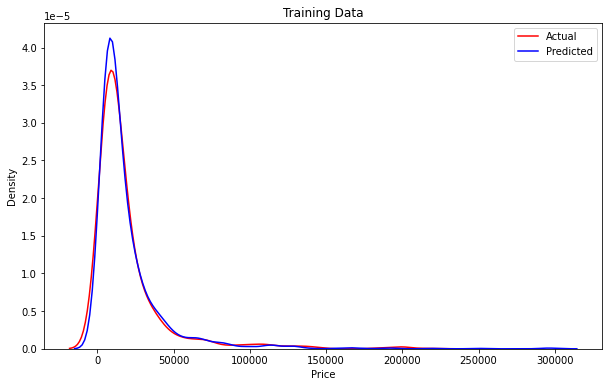

In [588]:
preds = model.predict(x_train)
ploty(x_test,preds,'Training Data')

If we add EngineV modle is performing well than before we can try with replacing the null values of EngineV with mean

### Replacing the EngineV null values with mean 

In [591]:
data = df.copy()
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
m = df.EngineV.mean()
data['EngineV'] = data.EngineV.fillna(m)
data = pd.get_dummies(data,columns=features)
#Decission Tree
model = DecisionTreeRegressor(max_leaf_nodes=750,random_state=0)
print('Decission Tree')
print(model_predict(data,model))
#Random Forest
print('Random Forest')
model = RandomForestRegressor(n_estimators=450,random_state=0)
print(model_predict(data,model))
#XGBoost
model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

Decission Tree
{'MAE_train': 977.0, 'MAE_test': 3387.0, 'RMSE_train': 2318.0, 'RMSE_test': 6923.0, 'r2_train': 0.9916608145737317, 'r2_test': 0.9306859075380136}
Random Forest
{'MAE_train': 1243.0, 'MAE_test': 3014.0, 'RMSE_train': 4000.0, 'RMSE_test': 7165.0, 'r2_train': 0.9725705770512625, 'r2_test': 0.9195415735671439}
XGRegressor
{'MAE_train': 957.0, 'MAE_test': 3141.0, 'RMSE_train': 2349.0, 'RMSE_test': 6932.0, 'r2_train': 0.9913744245185611, 'r2_test': 0.9321703713822355}


### Replacing the EngineV null values with median 

In [592]:
data = df.copy()
m = df.EngineV.median()
data['EngineV'] = data.EngineV.fillna(m)
data = pd.get_dummies(data,columns=features)
#Decission Tree
model = DecisionTreeRegressor(max_leaf_nodes=750,random_state=0)
print('Decission Tree')
print(model_predict(data,model))
#Random Forest
print('Random Forest')
model = RandomForestRegressor(n_estimators=450,random_state=0)
print(model_predict(data,model))
#XGBoost
model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

Decission Tree
{'MAE_train': 978.0, 'MAE_test': 3382.0, 'RMSE_train': 2319.0, 'RMSE_test': 7204.0, 'r2_train': 0.9916548346128904, 'r2_test': 0.9248001339547605}
Random Forest
{'MAE_train': 1242.0, 'MAE_test': 3006.0, 'RMSE_train': 4000.0, 'RMSE_test': 7138.0, 'r2_train': 0.9725926622552681, 'r2_test': 0.920176790763257}
XGRegressor
{'MAE_train': 927.0, 'MAE_test': 3037.0, 'RMSE_train': 2338.0, 'RMSE_test': 6571.0, 'r2_train': 0.9914617166486401, 'r2_test': 0.9378069236293342}


Replacing EngineV null values with median value is slightly improved the results.

###  Merging Hatch and Vegon in Body column with EngineV median

In [593]:
data = df.copy()#drop(columns='EngineV',axis=1)
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
m = data.EngineV.median()
data['EngineV'] = data['EngineV'].replace(np.nan,m)
data.loc[data.Body == 'hatch','Body'] = 'vagon'
data = pd.get_dummies(data,columns=features)
#Decission Tree
model = DecisionTreeRegressor(max_leaf_nodes=750,random_state=0)
print('Decission Tree')
print(model_predict(data,model))
#Random Forest
print('Random Forest')
model = RandomForestRegressor(n_estimators=450,random_state=0)
print(model_predict(data,model))
#XGBoost
model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

Decission Tree
{'MAE_train': 965.0, 'MAE_test': 3544.0, 'RMSE_train': 2312.0, 'RMSE_test': 7882.0, 'r2_train': 0.9917005122582115, 'r2_test': 0.9110834869372207}
Random Forest
{'MAE_train': 1240.0, 'MAE_test': 3017.0, 'RMSE_train': 4002.0, 'RMSE_test': 7154.0, 'r2_train': 0.9725871934955219, 'r2_test': 0.9200393218283286}
XGRegressor
{'MAE_train': 960.0, 'MAE_test': 3002.0, 'RMSE_train': 2368.0, 'RMSE_test': 6562.0, 'r2_train': 0.9912346593636011, 'r2_test': 0.9380311353575258}


###   Merging Hatch and Vegon in Body column with out EngineV 

In [595]:
data = df.copy()#drop(columns='EngineV',axis=1)
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
data.loc[data.Body == 'hatch','Body'] = 'vagon'
data = data.drop(['EngineV'],axis=1)
data = pd.get_dummies(data,columns=features)
#Decission Tree
model = DecisionTreeRegressor(max_leaf_nodes=750,random_state=0)
print('Decission Tree')
print(model_predict(data,model))
#Random Forest
print('Random Forest')
model = RandomForestRegressor(n_estimators=450,random_state=0)
print(model_predict(data,model))
#XGBoost
model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

Decission Tree
{'MAE_train': 1058.0, 'MAE_test': 3784.0, 'RMSE_train': 2485.0, 'RMSE_test': 8432.0, 'r2_train': 0.9904058386206666, 'r2_test': 0.8993484901937792}
Random Forest
{'MAE_train': 1397.0, 'MAE_test': 3326.0, 'RMSE_train': 4327.0, 'RMSE_test': 7144.0, 'r2_train': 0.966995545371814, 'r2_test': 0.9132036379006779}
XGRegressor
{'MAE_train': 1217.0, 'MAE_test': 3274.0, 'RMSE_train': 2669.0, 'RMSE_test': 7011.0, 'r2_train': 0.9887838159395492, 'r2_test': 0.9268634226702207}


### Merging Toyota and BMW column with  EngineV 

In [600]:
data = df.copy()
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
#data.loc[data.Body == 'hatch','Body'] = 'vagon'
data.loc[data.Brand == 'Toyota','Brand'] = 'BMW'
m = data.EngineV.median()
data['EngineV'] = data['EngineV'].replace(np.nan,m)
data = pd.get_dummies(data,columns=features)
#Decission Tree
model = DecisionTreeRegressor(max_leaf_nodes=750,random_state=0)
print('Decission Tree')
print(model_predict(data,model))
#Random Forest
print('Random Forest')
model = RandomForestRegressor(n_estimators=450,random_state=0)
print(model_predict(data,model))
#XGBoost
model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

Decission Tree
{'MAE_train': 974.0, 'MAE_test': 3680.0, 'RMSE_train': 2316.0, 'RMSE_test': 8526.0, 'r2_train': 0.9916714429007527, 'r2_test': 0.8891679097293519}
Random Forest
{'MAE_train': 1260.0, 'MAE_test': 3075.0, 'RMSE_train': 4026.0, 'RMSE_test': 7236.0, 'r2_train': 0.9721744585859571, 'r2_test': 0.9178014650502643}
XGRegressor
{'MAE_train': 993.0, 'MAE_test': 3172.0, 'RMSE_train': 2393.0, 'RMSE_test': 6877.0, 'r2_train': 0.9910388323124469, 'r2_test': 0.9319684327419393}


### EngineV - Median + Toyota_BMW + hetch_vegon

In [599]:
data = df.copy()#drop(columns='EngineV',axis=1)
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
m = data.EngineV.median()
data['EngineV'] = data['EngineV'].replace(np.nan,m)
data.loc[data.Body == 'hatch','Body'] = 'vagon'
data.loc[data.Brand == 'Toyota','Brand'] = 'BMW'
data = pd.get_dummies(data,columns=features)
#Decission Tree
model = DecisionTreeRegressor(max_leaf_nodes=750,random_state=0)
print('Decission Tree')
print(model_predict(data,model))
#Random Forest
print('Random Forest')
model = RandomForestRegressor(n_estimators=450,random_state=0)
print(model_predict(data,model))
#XGBoost
model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

Decission Tree
{'MAE_train': 960.0, 'MAE_test': 3982.0, 'RMSE_train': 2308.0, 'RMSE_test': 11166.0, 'r2_train': 0.9917283879108201, 'r2_test': 0.8320120693074256}
Random Forest
{'MAE_train': 1258.0, 'MAE_test': 3070.0, 'RMSE_train': 4026.0, 'RMSE_test': 7185.0, 'r2_train': 0.9721623505997704, 'r2_test': 0.9191136431880366}
XGRegressor
{'MAE_train': 945.0, 'MAE_test': 3152.0, 'RMSE_train': 2343.0, 'RMSE_test': 6845.0, 'r2_train': 0.9914170901275773, 'r2_test': 0.9326536847676032}


### Replacing the EngineV null values with mean 
* Decission Tree
<li> {'MAE_train': 977.0, 'MAE_test': 3387.0, 'RMSE_train': 2318.0, 'RMSE_test': 6923.0, 'r2_train': 0.9916608145737317, 'r2_test': 0.9306859075380136}
Random Forest
<li> {'MAE_train': 1243.0, 'MAE_test': 3014.0, 'RMSE_train': 4000.0, 'RMSE_test': 7165.0, 'r2_train': 0.9725705770512625, 'r2_test': 0.9195415735671439}
* XGRegressor
<li> {'MAE_train': 957.0, 'MAE_test': 3141.0, 'RMSE_train': 2349.0, 'RMSE_test': 6932.0, 'r2_train': 0.9913744245185611, 'r2_test': 0.9321703713822355}

### Replacing the EngineV null values with median 
* Decission Tree
<li> {'MAE_train': 978.0, 'MAE_test': 3382.0, 'RMSE_train': 2319.0, 'RMSE_test': 7204.0, 'r2_train': 0.9916548346128904, 'r2_test': 0.9248001339547605}
Random Forest
<li> {'MAE_train': 1242.0, 'MAE_test': 3006.0, 'RMSE_train': 4000.0, 'RMSE_test': 7138.0, 'r2_train': 0.9725926622552681, 'r2_test': 0.920176790763257}
* XGRegressor
<li> {'MAE_train': 927.0, 'MAE_test': 3037.0, 'RMSE_train': 2338.0, 'RMSE_test': 6571.0, 'r2_train': 0.9914617166486401, 'r2_test': 0.9378069236293342}

###  Merging Hatch and Vegon in Body column with EngineV median
* Decission Tree
<li> {'MAE_train': 965.0, 'MAE_test': 3544.0, 'RMSE_train': 2312.0, 'RMSE_test': 7882.0, 'r2_train': 0.9917005122582115, 'r2_test': 0.9110834869372207}
Random Forest
<li> {'MAE_train': 1240.0, 'MAE_test': 3017.0, 'RMSE_train': 4002.0, 'RMSE_test': 7154.0, 'r2_train': 0.9725871934955219, 'r2_test': 0.9200393218283286}
* XGRegressor
<li> {'MAE_train': 960.0, 'MAE_test': 3002.0, 'RMSE_train': 2368.0, 'RMSE_test': 6562.0, 'r2_train': 0.9912346593636011, 'r2_test': 0.9380311353575258}

###   Merging Hatch and Vegon in Body column with out EngineV 
* Decission Tree
<li> {'MAE_train': 1058.0, 'MAE_test': 3784.0, 'RMSE_train': 2485.0, 'RMSE_test': 8432.0, 'r2_train': 0.9904058386206666, 'r2_test': 0.8993484901937792}
Random Forest
<li> {'MAE_train': 1397.0, 'MAE_test': 3326.0, 'RMSE_train': 4327.0, 'RMSE_test': 7144.0, 'r2_train': 0.966995545371814, 'r2_test': 0.9132036379006779}
* XGRegressor
<li> {'MAE_train': 1217.0, 'MAE_test': 3274.0, 'RMSE_train': 2669.0, 'RMSE_test': 7011.0, 'r2_train': 0.9887838159395492, 'r2_test': 0.9268634226702207}

### Merging Toyota and BMW column with  EngineV 
* Decission Tree
<li> {'MAE_train': 974.0, 'MAE_test': 3680.0, 'RMSE_train': 2316.0, 'RMSE_test': 8526.0, 'r2_train': 0.9916714429007527, 'r2_test': 0.8891679097293519}
Random Forest
<li> {'MAE_train': 1260.0, 'MAE_test': 3075.0, 'RMSE_train': 4026.0, 'RMSE_test': 7236.0, 'r2_train': 0.9721744585859571, 'r2_test': 0.9178014650502643}
* XGRegressor
<li> {'MAE_train': 993.0, 'MAE_test': 3172.0, 'RMSE_train': 2393.0, 'RMSE_test': 6877.0, 'r2_train': 0.9910388323124469, 'r2_test': 0.9319684327419393}

### EngineV - Median + Toyota_BMW + hetch_vegon
* Decission Tree
<li> {'MAE_train': 960.0, 'MAE_test': 3982.0, 'RMSE_train': 2308.0, 'RMSE_test': 11166.0, 'r2_train': 0.9917283879108201, 'r2_test': 0.8320120693074256}
Random Forest
<li> {'MAE_train': 1258.0, 'MAE_test': 3070.0, 'RMSE_train': 4026.0, 'RMSE_test': 7185.0, 'r2_train': 0.9721623505997704, 'r2_test': 0.9191136431880366}
* XGRegressor
<li> {'MAE_train': 945.0, 'MAE_test': 3152.0, 'RMSE_train': 2343.0, 'RMSE_test': 6845.0, 'r2_train': 0.9914170901275773, 'r2_test': 0.9326536847676032}


Mergin of Body and Brand + EngineV replaced with mean performed well

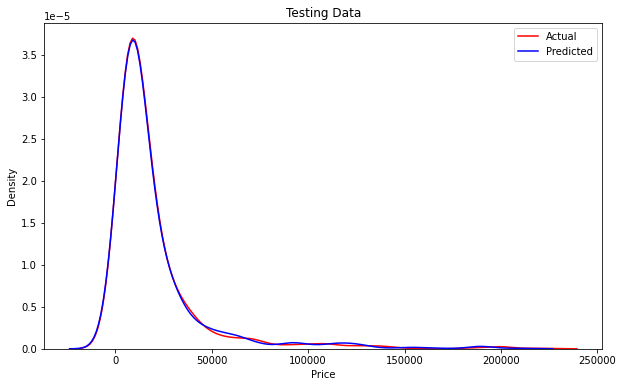

Actual :  [18600.0, 69900.0, 16500.0, 3100.0, 16200.0]
Predicted :  [21481. 54812. 15788.  2219. 14529.]


In [606]:
X=data.copy()
y = X.pop('Price')

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = XGBRegressor(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_test)
ploty(y_test,preds,'Testing Data')
print('Actual : ',y_test.head(5).tolist())
print('Predicted : ', preds[0:5].round())

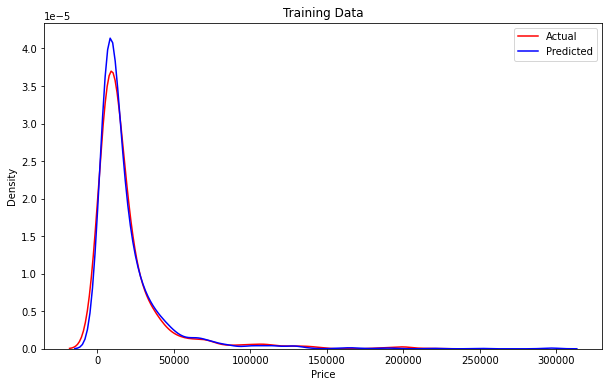

In [607]:
preds = model.predict(x_train)
ploty(y_train,preds,'Training Data')

Model is overfitted lets try remove the ourliers..

### Featre Engineering

In [666]:
data = df.copy()
X = data
y = X.pop('Price')
m = X.EngineV.median()
X['EngineV'] = X['EngineV'].fillna(m)
for col in X.select_dtypes(object).columns:
    X[col],_ = X[col].factorize()
discrete_features = X.dtypes=='int64'

In [667]:
def mi_scores(X,y,discreate_features):
    score = mutual_info_regression(X,y,discrete_features=discreate_features)
    score  = pd.Series(score,name='MI_Scores',index=X.columns)
    score.sort_values(ascending=False,inplace=True)
    return score
scores = mi_scores(X,y,discrete_features)
scores

Model           0.869486
Year            0.568613
Mileage         0.386376
EngineV         0.334350
Body            0.203651
Brand           0.176438
Registration    0.135887
Engine_Type     0.047391
Name: MI_Scores, dtype: float64

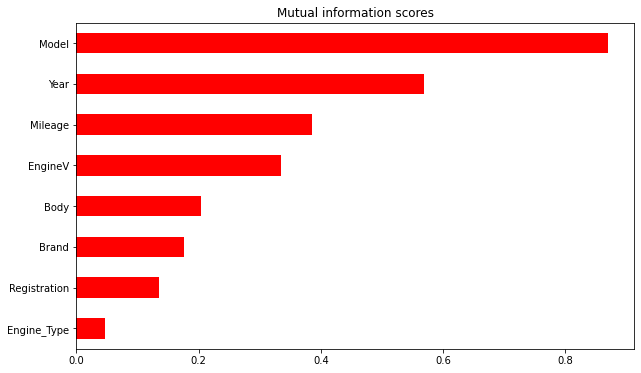

In [668]:
def mi_plot(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    yticks = scores.index
    scores.plot(kind='barh',figsize=(10,6),color='red')
    plt.title('Mutual information scores')
    plt.show()
mi_plot(scores)

### K-Means

In [688]:
features = ['Year','Mileage','EngineV']
data = df.copy()
X = data
y = X.pop('Price')
m = X.EngineV.median()
X['EngineV'] = X['EngineV'].fillna(m)
x_scaled = X[features] - X[features].mean(axis=0)/X[features].std(axis=0)

kmean = KMeans(n_clusters=6,random_state=0)
X["Cluster"] = kmean.fit_predict(x_scaled)
X.head()

,Brand,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model,Cluster
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,1
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,3
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,3
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,1
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,5


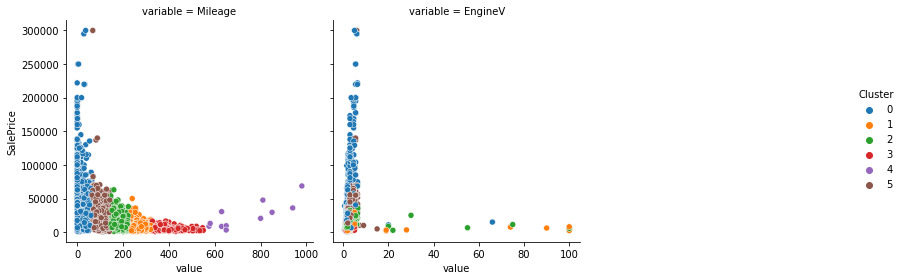

In [670]:
Xy = X.copy()
features = ['Mileage','EngineV']
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);


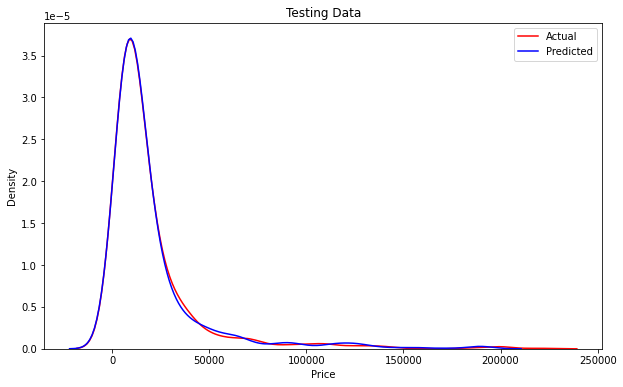

Actual :  [18600.0, 69900.0, 16500.0, 3100.0, 16200.0]
Predicted :  [20283. 61893. 14636.  2196. 14435.]
XGRegressor
{'MAE_train': 962.0, 'MAE_test': 3001.0, 'RMSE_train': 2361.0, 'RMSE_test': 6495.0, 'r2_train': 0.9912838019088438, 'r2_test': 0.9389351983804483}


In [689]:
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
Xy = pd.get_dummies(X,columns=features)
x_train,x_test,y_train,y_test = train_test_split(Xy,y,random_state=0)
model = XGBRegressor(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_test)
ploty(y_test,preds,'Testing Data')
print('Actual : ',y_test.head(5).tolist())
print('Predicted : ', preds[0:5].round())

data = X.join(y)
data = pd.get_dummies(data,columns=features)
#Decission Tree

model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

In [690]:
X_cd = kmean.fit_transform(x_scaled)
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

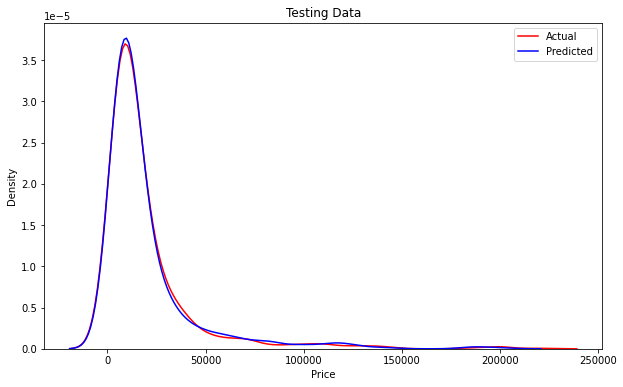

Actual :  [18600.0, 69900.0, 16500.0, 3100.0, 16200.0]
Predicted :  [19502. 58222. 14935.  2662. 13039.]


In [691]:
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
Xy = pd.get_dummies(X,columns=features)
x_train,x_test,y_train,y_test = train_test_split(Xy,y,random_state=0)
model = XGBRegressor(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_test)
ploty(y_test,preds,'Testing Data')
print('Actual : ',y_test.head(5).tolist())
print('Predicted : ', preds[0:5].round())

In [692]:
data = X.join(y)
data = pd.get_dummies(data,columns=features)
#Decission Tree

model = XGBRegressor(n_estimators=400,random_state=0)
print('XGRegressor')
print(model_predict(data,model))

XGRegressor
{'MAE_train': 602.0, 'MAE_test': 3320.0, 'RMSE_train': 856.0, 'RMSE_test': 7487.0, 'r2_train': 0.9988629539909912, 'r2_test': 0.9119970661952146}


### PCA

In [714]:
from sklearn.decomposition import PCA

In [715]:
features = ['Year','Mileage','EngineV']
data = df.copy()
X = data
y = X.pop('Price')
m = X.EngineV.median()
X['EngineV'] = X['EngineV'].fillna(m)
x_scaled = X[features] - X[features].mean(axis=0)/X[features].std(axis=0)
x_scaled.head()

,Year,Mileage,EngineV
0,1690.947803,275.434615,1.433962
1,1698.947803,425.434615,2.333962
2,1702.947803,356.434615,4.433962
3,1706.947803,238.434615,3.633962
4,1710.947803,118.434615,1.433962


In [716]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [718]:
X = df.copy()
y = X.pop("Price")
X = X.loc[:, features]
m = X.EngineV.median()
X['EngineV'] = X['EngineV'].fillna(m)
# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X)
print(loadings)

              PC1       PC2       PC3
Year    -0.706090  0.035684  0.707223
Mileage  0.705830 -0.044837  0.706961
EngineV  0.056937  0.998357  0.006472


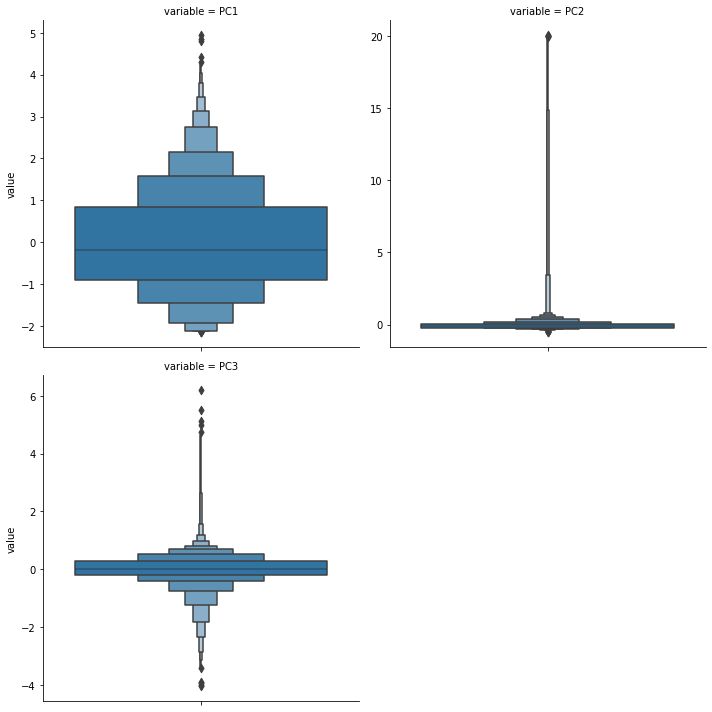

In [719]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

In [881]:
idx = X_pca.sort_values(by='PC2',ascending=True).index
data = df.iloc[idx]
data.head(25)

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
1169,Toyota,2800.0,other,421,1.3,Gas,yes,1988,Corolla
4329,Volkswagen,2200.0,hatch,400,1.3,Other,yes,1987,Golf II
1393,Toyota,2700.0,sedan,550,1.6,Gas,yes,1989,Carina
2873,Volkswagen,1900.0,vagon,504,1.6,Gas,yes,1988,Passat B2
2887,Volkswagen,2850.0,vagon,450,1.6,Diesel,yes,1988,Passat B2
2544,Volkswagen,2000.0,sedan,300,1.3,Petrol,yes,1988,Jetta
2196,Volkswagen,7000.0,van,350,1.0,Other,yes,2004,T5 (Transporter)
2512,Mercedes-Benz,3800.0,other,107,0.6,Petrol,yes,2000,Smart
217,Volkswagen,1800.0,other,300,1.3,Petrol,yes,1989,Golf II
1685,Renault,3100.0,hatch,275,1.2,Petrol,yes,1991,Clio


<AxesSubplot:xlabel='EngineV', ylabel='Price'>

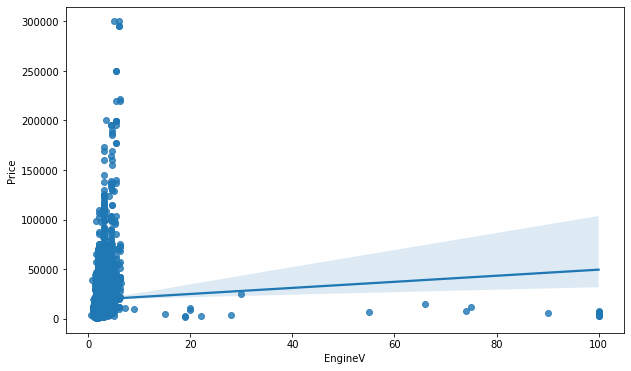

In [853]:
plt.figure(figsize=(10,6))
sns.regplot(x='EngineV',y='Price',data=data)

In [876]:
idx = X_pca.sort_values(by='PC3',ascending=True).index
data = df.iloc[idx]
data.head(25)

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
810,Mercedes-Benz,34999.00,sedan,150,2.8,Petrol,yes,1969,S 280
1896,Mercedes-Benz,1950.00,sedan,1,2.0,Diesel,yes,1979,200
288,Toyota,600.00,sedan,10,1.5,Petrol,yes,1979,Corolla
4234,Volkswagen,1296.75,sedan,1,1.6,Petrol,yes,1980,Jetta
3773,Volkswagen,1300.00,other,10,1.6,Diesel,yes,1984,T2 (Transporter)
752,Mitsubishi,5500.00,crossover,1,2.0,Petrol,yes,1986,Pajero
3227,Mercedes-Benz,2650.00,sedan,30,2.3,Gas,yes,1985,230
1828,Volkswagen,2200.00,hatch,33,1.9,Diesel,yes,1985,Golf II
141,Audi,600.00,sedan,112,1.6,Petrol,yes,1980,80
3852,Volkswagen,1950.00,hatch,94,1.1,Petrol,yes,1982,Golf II


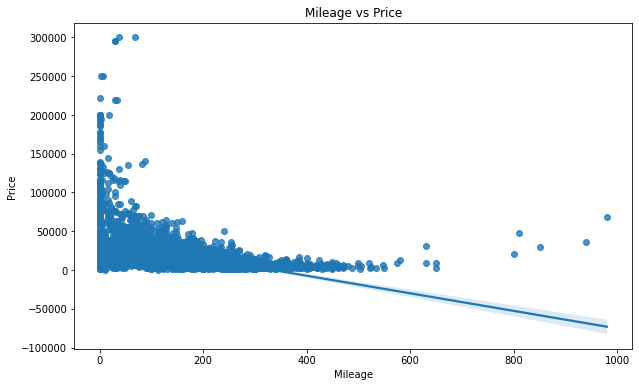

In [875]:
plt.figure(figsize=(10,6))
sns.regplot(x='Mileage',y='Price',data=data).set(xlabel='Mileage',ylabel='Price',title='Mileage vs Price')
plt.show()

In [886]:
idx = X_pca.sort_values(by='PC1',ascending=False).index
data = df.iloc[idx]
data.head(25)

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
3567,Toyota,36000.0,crossover,940,NaN,Other,yes,2009,Land Cruiser 200
4319,Mercedes-Benz,5500.0,sedan,440,2.00,Petrol,yes,1978,E-Class
2607,Mercedes-Benz,68700.0,crossover,980,3.00,Diesel,yes,2013,GL 350
1393,Toyota,2700.0,sedan,550,1.60,Gas,yes,1989,Carina
396,Mercedes-Benz,2650.0,sedan,470,2.00,Gas,yes,1985,190
2488,Mitsubishi,2300.0,sedan,523,1.80,Diesel,yes,1989,Lancer
2873,Volkswagen,1900.0,vagon,504,1.60,Gas,yes,1988,Passat B2
1041,BMW,29500.0,sedan,850,NaN,Petrol,yes,2011,523
3457,Volkswagen,3200.0,other,650,1.90,Diesel,yes,1999,Caddy
1813,Mercedes-Benz,8500.0,van,630,2.90,Diesel,yes,1998,Sprinter 312


In [822]:
idx = X_pca.loc[(X_pca.PC2<0.8)&(X_pca.PC1<3)&(X_pca.PC3>-3)&(X_pca.PC3<2)].index
data = df.copy()
data = df.iloc[idx]

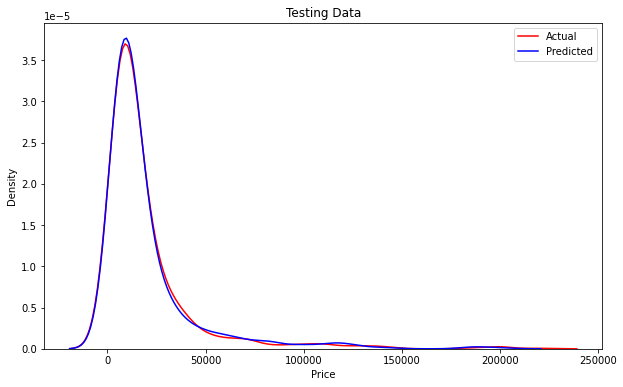

Actual :  [18600.0, 69900.0, 16500.0, 3100.0, 16200.0]
Predicted :  [19502. 58222. 14935.  2662. 13039.]


In [890]:
#removed pc2 outliers
features = ['Brand', 'Body', 'Registration','Model','Engine_Type']
data = df.copy()
data = data.loc[(data.EngineV<=7.0)&(data.Mileage<600)&(data.Mileage>0)]
m = data.EngineV.median()
data['EngineV'] = data['EngineV'].fillna(m)

data.loc[data.Body == 'hatch','Body'] = 'vagon'
data.loc[data.Brand == 'Toyota','Brand'] = 'BMW'
data =data.drop('EngineV',axis=1)
data = pd.get_dummies(data,columns=features)

x_train,x_test,y_train,y_test = train_test_split(Xy,y,random_state=0)
model = XGBRegressor(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_test)
ploty(y_test,preds,'Testing Data')
print('Actual : ',y_test.head(5).tolist())
print('Predicted : ', preds[0:5].round())

In [891]:
model_predict(data,RandomForestRegressor())

{'MAE_train': 1325.0,
 'MAE_test': 3559.0,
 'RMSE_train': 4085.0,
 'RMSE_test': 9128.0,
 'r2_train': 0.9580172558730967,
 'r2_test': 0.7764170240739958}